In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pprint import pprint
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import LsiModel
from gensim.models import LdaModel
from gensim.models.wrappers import LdaMallet

import pyLDAvis # pip install pyLDAvis==2.1.2
from pyLDAvis import gensim


In [3]:
df_topic = "data/reviews_tgtg_topic.pkl" 

with open(df_topic, 'rb') as f:
    df_topic = pickle.load(f)

df_topic.head(5)

,preprocessed_content,rating,date,source
0,"exactly,say,efficiently,saving,food,filling,be...",5,2021-12,Google
1,"ive,different,vendor,donut,shop,bought,bag,hor...",4,2021-12,Google
2,"week,im,looking,forward,great,deal,ahead",5,2021-12,Google
3,"loving,app",5,2021-12,Google
4,"lovely,experience,charming,staff,moderately,hi...",2,2021-12,Google


### Reviews Distribution per channel Chart

Text(0.5, 1.0, 'Reviews Distribution per Platform')

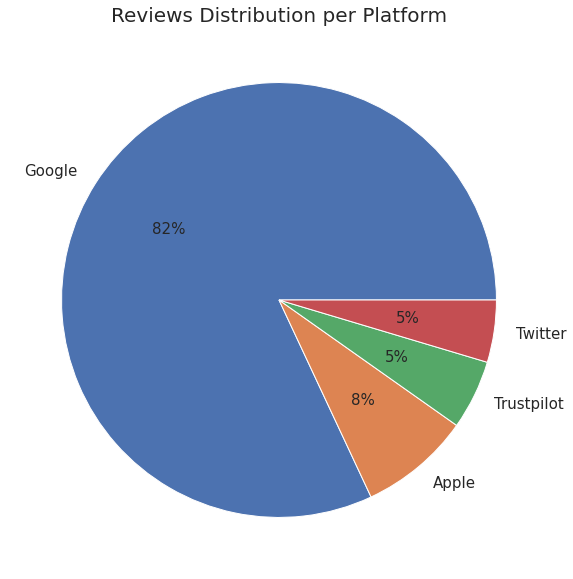

In [43]:
plt.figure(figsize=(20,10))
plt.pie(df_topic['source'].value_counts(), labels = ['Google','Apple','Trustpilot','Twitter'],autopct='%1.0f%%',textprops={'fontsize': 15})
plt.title('Reviews Distribution per Platform', fontsize = 20)

### Reviews Distribution per Rating Chart

Text(0.5, 1.0, 'Reviews Distribution per Rating')

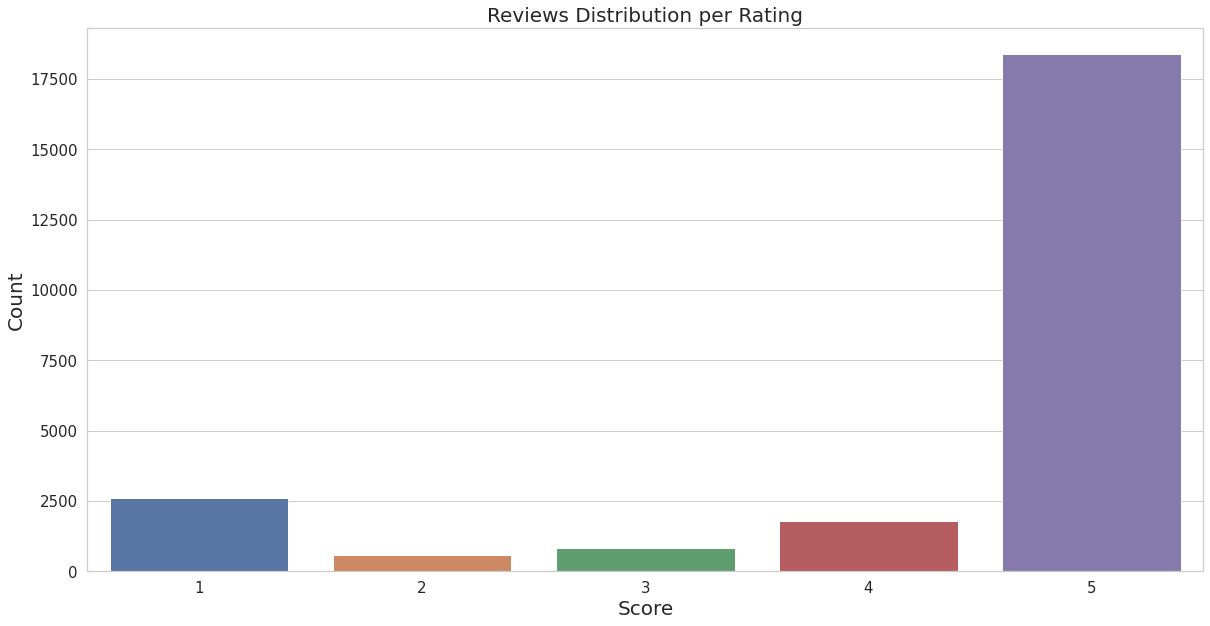

In [55]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.countplot(x='rating', data=df_topic)
plt.xlabel('Score', size=20)
plt.xticks(size=15)
plt.ylabel('Count',size=20)
plt.yticks(size=15)
plt.title('Reviews Distribution per Rating', fontsize = 20)

### PylDavis Chart

In [11]:
# Transform 'preprocessed_content' into a list
df_topic['preprocessed_content']= df_topic['preprocessed_content'].apply(lambda x: x[1:-1].split(','))
df_topic['preprocessed_content'][0]

['xactly',
 'say',
 'efficiently',
 'saving',
 'food',
 'filling',
 'belly',
 'discoun']

In [12]:
# Create a corpus
corpus = df_topic['preprocessed_content']

In [13]:
# Compute the dictionary: this is a dictionary mapping words and their corresponding numbers for later visualisation
id2word = Dictionary(corpus)

In [14]:
# Create a BOW
bow = [id2word.doc2bow(line) for line in corpus]  # convert corpus to BoW format

In [15]:
# Instanciate a TF-IDF
tfidf_model = TfidfModel(bow)

In [16]:
# Compute the TF-IDF
tf_idf_gensim = tfidf_model[bow]

In [17]:
# compute LDA
lda1 = LdaModel(corpus=tf_idf_gensim, num_topics=4, id2word=id2word, passes=10, random_state=0)

In [18]:
# print the most frequent words of each topic
pprint(lda1.print_topics())

[(0,
  '0.028*"c" + 0.028*"t" + 0.016*"ide" + 0.014*"co" + 0.007*"mone" + 0.006*"" '
  '+ 0.006*"skin" + 0.005*"ave" + 0.005*"tone" + 0.005*"win"'),
 (1,
  '0.019*"t" + 0.015*"c" + 0.011*"food" + 0.009*"bag" + 0.007*"good" + '
  '0.007*"waste" + 0.007*"app" + 0.006*"s" + 0.005*"time" + 0.005*"magic"'),
 (2,
  '0.035*"ap" + 0.021*"reat" + 0.015*"foo" + 0.013*"wast" + 0.012*"great" + '
  '0.012*"idea" + 0.011*"ove" + 0.011*"mazing" + 0.010*"app" + 0.010*"save"'),
 (3,
  '0.009*"us" + 0.007*"xcellent" + 0.007*"app" + 0.007*"easy" + 0.007*"oo" + '
  '0.006*"asy" + 0.006*"valu" + 0.006*"million" + 0.006*"great" + '
  '0.006*"idea"')]


In [19]:
# check the coherence of your model & adjust num_topics to improve your coherence (since our preprocessing 
# has been done properly)
lda1_8 = LdaModel(corpus=tf_idf_gensim, num_topics=8, id2word=id2word, passes=10, random_state=0)
pprint(lda1_8.print_topics())

[(0,
  '0.040*"ide" + 0.022*"us" + 0.015*"" + 0.011*"reat" + 0.010*"easy" + '
  '0.010*"rillian" + 0.009*"asy" + 0.009*"c" + 0.009*"uper" + 0.006*"wesom"'),
 (1,
  '0.049*"c" + 0.036*"t" + 0.012*"food" + 0.011*"face" + 0.009*"bag" + '
  '0.007*"smiling" + 0.007*"good" + 0.007*"waste" + 0.006*"magic" + '
  '0.006*"great"'),
 (2,
  '0.060*"ap" + 0.019*"reat" + 0.015*"ove" + 0.012*"ave" + 0.012*"est" + '
  '0.009*"thrown" + 0.008*"experienc" + 0.008*"wesome" + 0.007*"ood" + '
  '0.007*"initiativ"'),
 (3,
  '0.068*"co" + 0.016*"t" + 0.015*"campaign" + 0.009*"aked" + 0.007*"icking" + '
  '0.007*"partnership" + 0.007*"ab" + 0.007*"discover" + 0.006*"o" + '
  '0.006*"start"'),
 (4,
  '0.014*"t" + 0.011*"app" + 0.010*"food" + 0.009*"but" + 0.008*"time" + '
  '0.008*"not" + 0.008*"waste" + 0.007*"good" + 0.007*"bag" + 0.006*"s"'),
 (5,
  '0.021*"reat" + 0.018*"food" + 0.018*"foo" + 0.017*"great" + 0.016*"wast" + '
  '0.016*"xcellent" + 0.015*"valu" + 0.014*"idea" + 0.014*"save" + '
  '0.014*"ap

In [20]:
# check the coherence of your model & adjust num_topics to improve your coherence (since our preprocessing 
# has been done properly)
lda1_10 = LdaModel(corpus=tf_idf_gensim, num_topics=10, id2word=id2word, passes=10, random_state=0)
pprint(lda1_10.print_topics())

[(0,
  '0.042*"ide" + 0.018*"est" + 0.009*"ew" + 0.009*"reat" + 0.008*"nero" + '
  '0.007*"bar" + 0.006*"eliminate" + 0.006*"yo" + 0.006*"de" + 0.005*"launch"'),
 (1,
  '0.021*"don" + 0.017*"xcellen" + 0.017*"us" + 0.016*"concep" + '
  '0.014*"rdered" + 0.011*"easy" + 0.009*"seful" + 0.007*"shame" + '
  '0.007*"perfectly" + 0.007*"fraction"'),
 (2,
  '0.090*"ap" + 0.027*"reat" + 0.023*"ove" + 0.014*"wesome" + 0.013*"rilliant" '
  '+ 0.012*"fighting" + 0.010*"initiativ" + 0.010*"past" + 0.010*"fa" + '
  '0.009*"team"'),
 (3,
  '0.021*"oo" + 0.021*"rea" + 0.016*"t" + 0.014*"campaign" + 0.013*"tomorrow" '
  '+ 0.010*"aved" + 0.009*"sushi" + 0.009*"thrown" + 0.009*"aked" + '
  '0.008*"green"'),
 (4,
  '0.013*"bag" + 0.010*"but" + 0.010*"time" + 0.009*"app" + 0.009*"not" + '
  '0.008*"food" + 0.008*"s" + 0.007*"good" + 0.007*"got" + 0.007*"magic"'),
 (5,
  '0.023*"asy" + 0.018*"valu" + 0.016*"mazin" + 0.013*"showing" + '
  '0.013*"globe" + 0.012*"use" + 0.010*"download" + 0.010*"us" + '
  '

In [21]:
# Import the modules
import pyLDAvis
from pyLDAvis import gensim

# Visualize the different topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=lda1, corpus=bow, dictionary=id2word)
vis

/home/vb/.pyenv/versions/3.9.7/envs/artefact/lib/python3.9/site-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \
/home/vb/.pyenv/versions/3.9.7/envs/artefact/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/vb/.pyenv/versions/3.9.7/envs/artefact/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.192526 -0.130152       1        1  64.319676
3     -0.060714  0.141375       2        1  15.500730
2      0.056935  0.102396       3        1  10.673548
0      0.196305 -0.113619       4        1   9.506046, topic_info=         Term         Freq        Total Category  logprob  loglift
1394        t  4395.000000  4395.000000  Default  30.0000  30.0000
782         c  3601.000000  3601.000000  Default  29.0000  29.0000
37         ap  1077.000000  1077.000000  Default  28.0000  28.0000
1032       co  1150.000000  1150.000000  Default  27.0000  27.0000
88       reat  1539.000000  1539.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
401       win   140.506066   343.302841   Topic4  -5.2759   1.4599
110     thumb    89.265101   137.028422   Topic4  -5.7296   1.9247
528      hand   101.833315   307.914192   Topic4  -5.5978   1.2468
88       reat   120.788966  1539.367256   Topic4  -5.4271  -0.1918
1895  showing    75.279562   143.888124   Topic4  -5.9000   1.7054

[245 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
753       1  0.581359       
753       2  0.002474       
753       3  0.002474       
753       4  0.415610       
3001      1  0.018841  agged
...     ...       ...    ...
1362      4  0.012758     yo
7985      1  0.196376   york
7985      2  0.010336   york
7985      3  0.010336   york
7985      4  0.785505   york

[756 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

### Histogram of review counts by month

In [49]:
import plotly.express as px

fig = px.histogram(df_topic, x='date', template='plotly_white', title='Review counts by month')
fig.update_xaxes(categoryorder='category descending', title='Month').update_yaxes(title='Number of reviews')
fig.show()

### Histogram of review counts by narrative length

In [ ]:
fig = px.histogram(df_topic, x='Review_Length', template='plotly_white', title='Complain counts by length')
fig.update_xaxes(categoryorder='total descending', title='Number of words').update_yaxes(title='Number of complaints')
fig.show()

### Wordcloud